In [1]:
using PyPlot, DynamicalSystems

┌ Info: Recompiling stale cache file /home/szhydkov/.julia/compiled/v1.0/DynamicalSystems/TY1vN.ji for DynamicalSystems [61744808-ddfa-5f27-97ff-6e42cc95d634]
└ @ Base loading.jl:1184


### Using DynamicalSystems.jl

In [2]:
function f(dx, x, p, n)
    a = p[1]; b = p[2]
    dx[1] = exp(-a*x[1]^2) + b
    return dx
end
ds = DiscreteDynamicalSystem(f, [0.0], [7.0, 1.0])

1-dimensional discrete dynamical system
 state:       [0.0]
 e.o.m.:      f
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  [7.0, 1.0]

In [3]:
i = 1
pvalues = -1:0.001:1
# ics = [rand() for m in 1:10]
n = 1000
Ttr = 2000
p_index = 2
output = orbitdiagram(ds, i, p_index, pvalues; n = n, Ttr = Ttr)

L = length(pvalues)
x = Vector{Float64}(undef, n*L)
y = copy(x)
for j in 1:L
    x[(1 + (j-1)*n):j*n] .= pvalues[j]
    y[(1 + (j-1)*n):j*n] .= output[j]
end

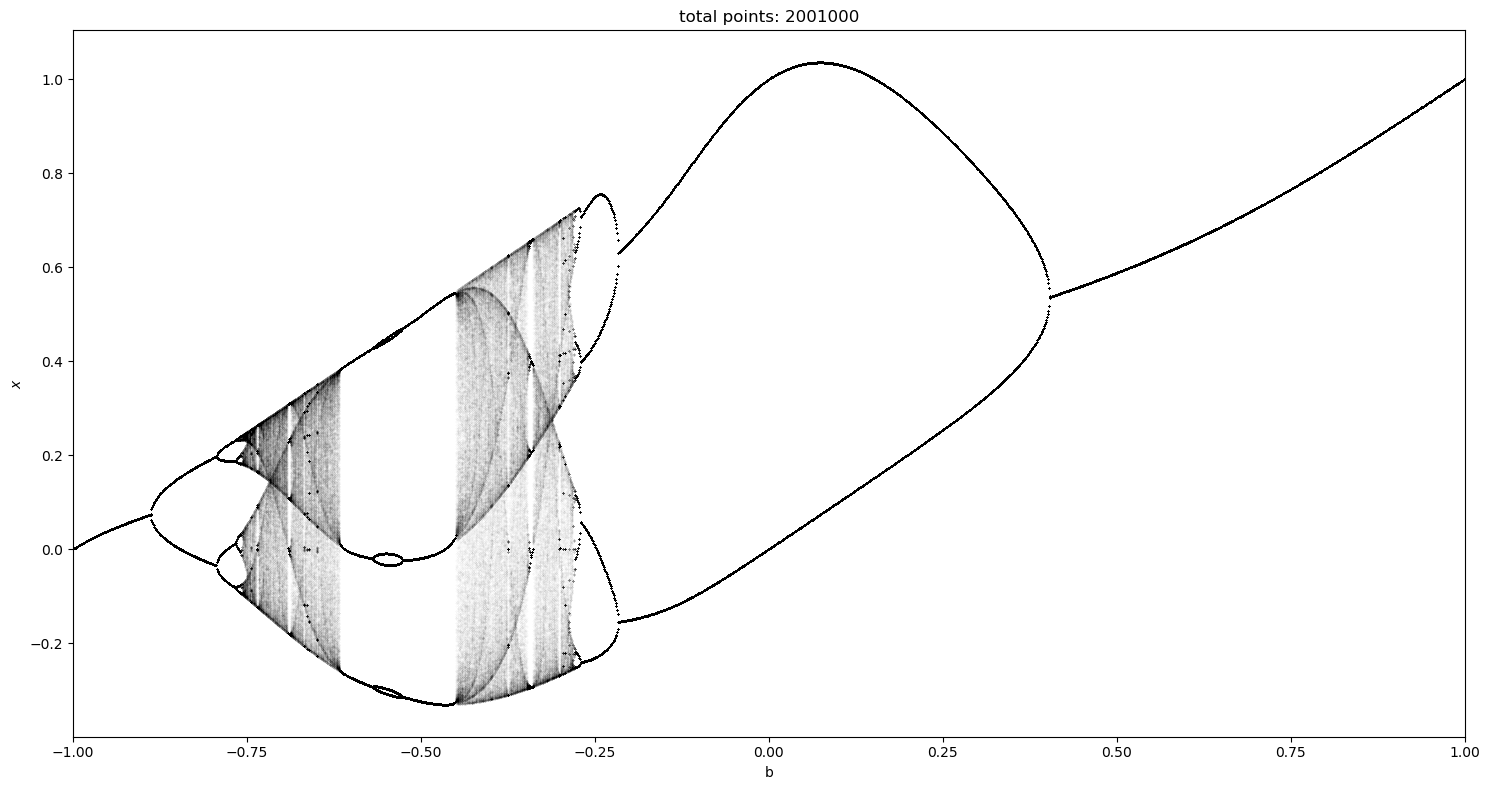

In [5]:
figure(figsize = (15,8))
PyPlot.title("total points: $(L*n)")
plot(x, y, ls = "None", ms = 0.2, color = "black", marker = "o", alpha = 0.05)
xlim(pvalues[1], pvalues[end]); 
xlabel("b"); ylabel("\$x\$")
tight_layout()
# savefig("q3.pdf")
savefig("q3.png")

### Q3 Lyapunov exponents

In [6]:
f(x, a, b) = exp(-a*x^2) + b
df(x) = -2*a*x*exp(-a*x^2)

df (generic function with 1 method)

In [7]:
a = 5
N = 10000
t = -1:0.001:1
X = zeros(length(t), N)
X[:, 1] = zeros(length(t)).+sqrt(2)/10
i = 1
for b in t
    for j in 2:N
        X[i, j] = f(X[i, j-1], a, b)
    end
    i += 1
end

In [8]:
L = sum(log.(abs.(df.(X))), dims=2)/N

2001×1 Array{Float64,2}:
 -Inf                 
   -4.608657020885794 
   -3.920692673298677 
   -3.5202636521739152
   -3.2375314586943156
   -3.0193029050438898
   -2.84178954130354  
   -2.6921912895103266
   -2.563230255115804 
   -2.44998069367479  
   -2.3491089837070116
   -2.258241400259125 
   -2.1756266010701237
    ⋮                 
   -2.6625428390154116
   -2.6709216238707603
   -2.6793145877495883
   -2.6877217191049048
   -2.6961430063100362
   -2.704578437663011 
   -2.713028001383536 
   -2.7214916856152183
   -2.7299694784313977
   -2.7384613678291445
   -2.7469673417354494
   -2.755487388009135 

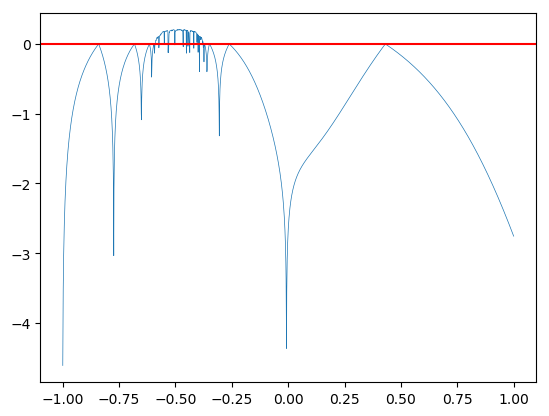

PyObject <matplotlib.lines.Line2D object at 0x7fe2eb182a58>

In [9]:
plot(t, L, linewidth=0.5)
axhline(0, color = "r")

# Q4 

In [10]:
function g(dx, x, p, n)
    a, b, c, d = p
    dx[1] = x[1]^2 - x[2]^2 + a*x[1] + b*x[2]
    dx[2] = 2*x[1]*x[2] + c*x[1] + d*x[2]
    return dx
end

g (generic function with 1 method)

In [11]:
p = [0.9, -0.6013, 2, 0.5]
ds = DiscreteDynamicalSystem(g, [0.01, 0.01], p)

2-dimensional discrete dynamical system
 state:       [0.01, 0.01]
 e.o.m.:      g
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  [0.9, -0.6013, 2.0, 0.5]

In [12]:
run = trajectory(ds, 10000);

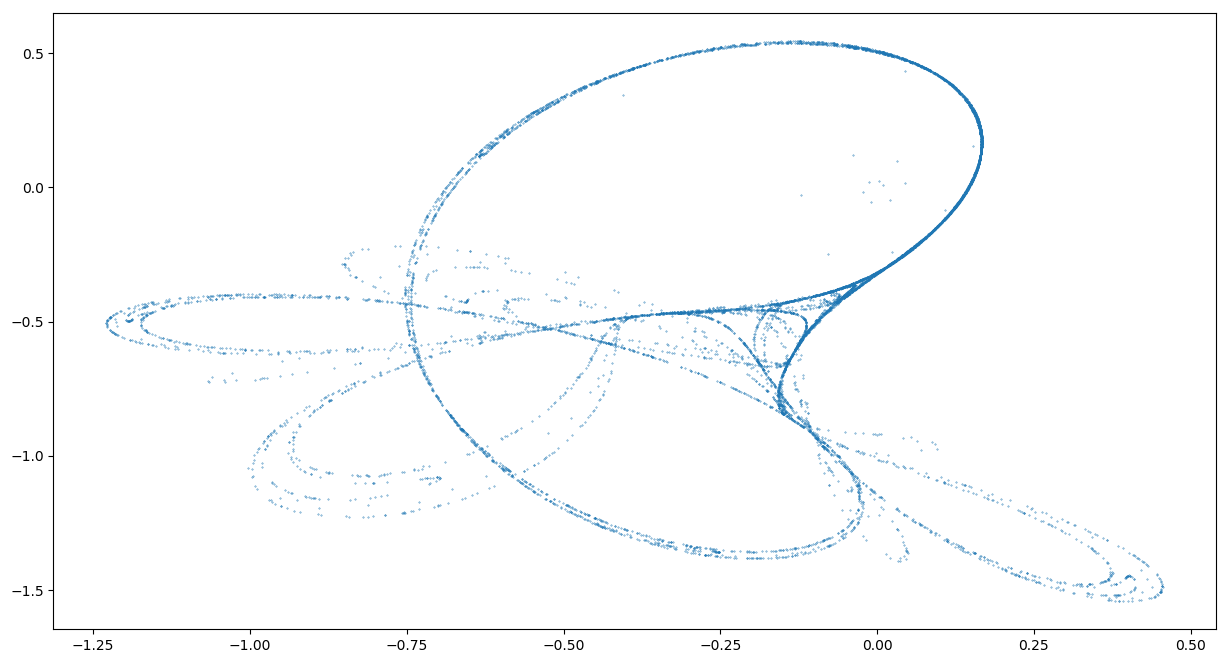

PyObject <matplotlib.collections.PathCollection object at 0x7fe2eb156860>

In [13]:
figure(figsize = (15,8))
scatter(run[:, 1], run[:, 2], s=0.1)

In [14]:
p2 = [0.3, 0.6, 2, 0.27]
ds2 = DiscreteDynamicalSystem(g, [0.01, 0.01], p2)
run2 = trajectory(ds2, 10000)

2-dimensional Dataset{Float64} with 10001 points
 0.01       0.01     
 0.009      0.0229   
 0.0159966  0.0245952
 0.0192071  0.0394208
 0.0282295  0.050572 
 0.0370514  0.0729687
 0.050945   0.0992116
 0.0675629  0.138786 
 0.0888436  0.191352 
 0.112742   0.263353 
 0.13519    0.355971 
 0.145701   0.46274  
 0.128455   0.551185 
 ⋮                   
 0.0714757  0.338453 
 0.115073   0.282716 
 0.137465   0.371545 
 0.145017   0.477396 
 0.123066   0.557393 
 0.0758139  0.53382  
 0.0638199  0.376701 
 0.107336   0.277431 
 0.133212   0.349135 
 0.145295   0.453709 
 0.131073   0.544935 
 0.0865086  0.55213  


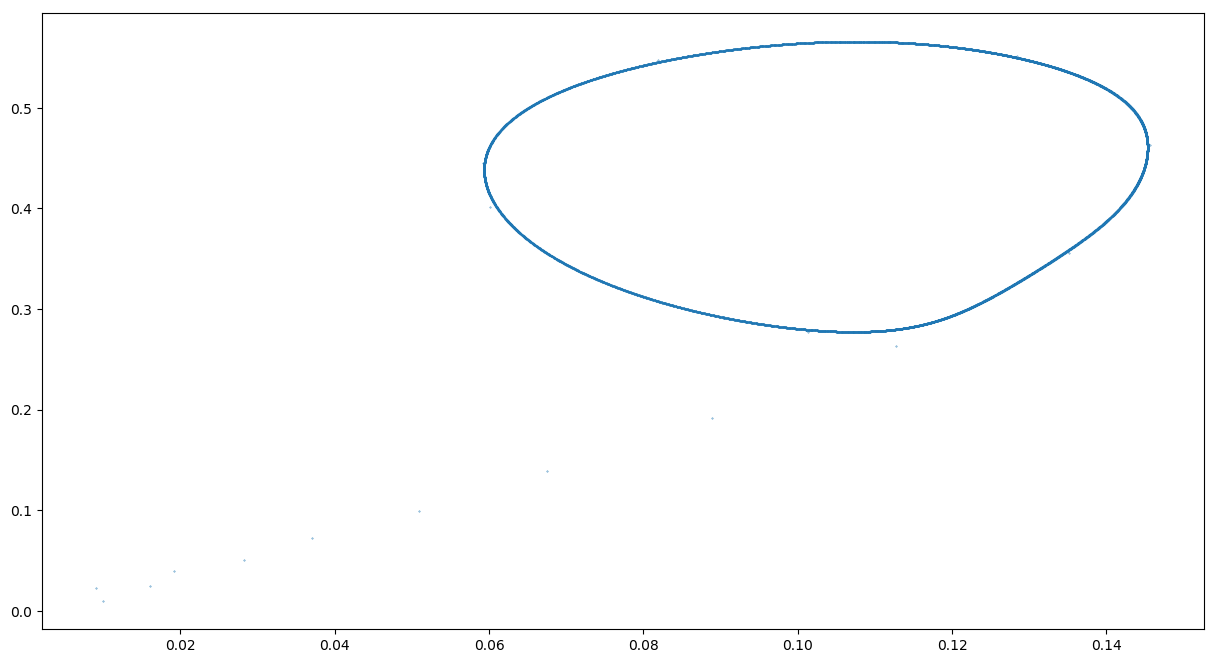

PyObject <matplotlib.collections.PathCollection object at 0x7fe2eb12cba8>

In [15]:
figure(figsize = (15,8))
scatter(run2[:, 1], run2[:, 2], s=0.1)

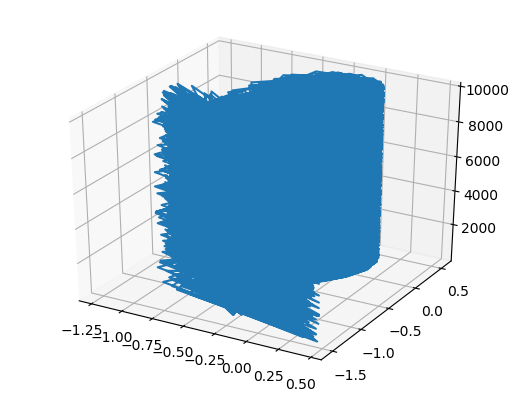

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7fe2e28e3e10>

In [16]:
plot3D(run[:, 1], run[:, 2], 1:10001, markersize=0.1) #lol ignore this